# Classification of MNIST database with a MLP
More info on the database can be found [here](http://yann.lecun.com/exdb/mnist/).

## Load the MNIST dataset

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Visualise the first six training images

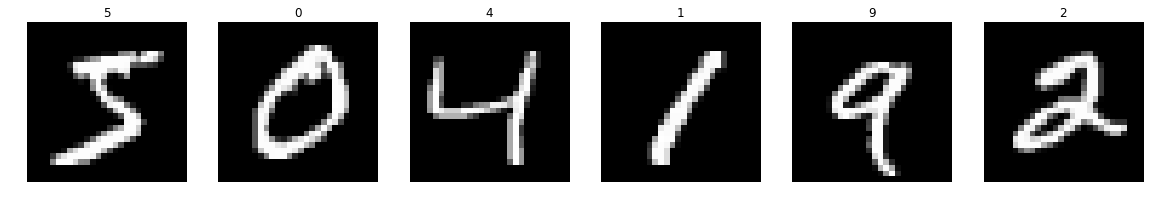

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fig, ax = plt.subplots(ncols=6, figsize=(20, 20))
for i in range(6):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].set_title(str(y_train[i]))
    ax[i].axis("off")    

## Rescale the images

Every pixel in the images have integer values in range [0, 255] (where 0 - black, 255 - white). The pixels need to be rescale from [0, 255] to [0, 1].

In [6]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## Preprocess labels
Apply One-Hot encoding to the labels, i.e. 7 -> 0 0 0 0 0 0 0 1 0 0.

In [8]:
from keras.utils import np_utils

print('Integer-valued labels:')
print(y_train[:10])

# Apply One-Hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print('\nOne-Hot encoded labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]

One-Hot encoded labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


## MLP for Image Classifacation

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()

# Input layer of 784 nodes
# Flatten layer takes in a matrix and turns it into a vector
model.add(Flatten(input_shape=X_train.shape[1:]))

# 1st hidden layer of 512 nodes
model.add(Dense(512, activation='relu'))

# Add dropout to the 1st hidden layer. 0.2 is the prob. of Dropout
model.add(Dropout(0.2)) 

# 2nd hidden layer of 512 nodes
model.add(Dense(512, activation='relu'))

# Add dropout to the 2nd hidden layer
model.add(Dropout(0.2))

# Output layer - 10 labels
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Compile the model
List of available optimisers in Keras:
 - [SGD](http://sebastianruder.com/optimizing-gradient-descent/index.html#stochasticgradientdescent)
 - [RMSprop](http://sebastianruder.com/optimizing-gradient-descent/index.html#rmsprop)
 - [Adagrad](http://sebastianruder.com/optimizing-gradient-descent/index.html#adagrad)
 - [Adadelta](http://sebastianruder.com/optimizing-gradient-descent/index.html#adadelta)
 - [AdaMax](http://sebastianruder.com/optimizing-gradient-descent/index.html#adamax)
 - [Nadam](http://sebastianruder.com/optimizing-gradient-descent/index.html#nadam)
 - TFOptimizer

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Model Validation

- [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint)
- [EarlyStopping](https://keras.io/callbacks/#earlystopping)

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5',
                               verbose=1,
                               save_best_only=True)

early_stop = EarlyStopping(monitor='val_loss', 
                           min_delta=1e-4,
                           patience=5, 
                           verbose=1, 
                           mode='auto')

history = model.fit(X_train, 
                    y_train, 
                    batch_size=128,
                    epochs=10,
                    validation_split=0.2,
                    callbacks=[checkpointer, early_stop],
                    verbose=1, 
                    shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s - loss: 0.0129 - acc: 0.9973 - val_loss: 0.0804 - val_acc: 0.9896
Epoch 2/10
48000/48000 [==============================] - 1s - loss: 0.0115 - acc: 0.9974 - val_loss: 0.0956 - val_acc: 0.9888
Epoch 3/10
48000/48000 [==============================] - 1s - loss: 0.0107 - acc: 0.9978 - val_loss: 0.0986 - val_acc: 0.9888
Epoch 4/10
48000/48000 [==============================] - 1s - loss: 0.0097 - acc: 0.9979 - val_loss: 0.0942 - val_acc: 0.9883
Epoch 5/10
48000/48000 [==============================] - 1s - loss: 0.0105 - acc: 0.9981 - val_loss: 0.0938 - val_acc: 0.9887
Epoch 6/10
48000/48000 [==============================] - 1s - loss: 0.0095 - acc: 0.9981 - val_loss: 0.0789 - val_acc: 0.9901
Epoch 7/10
48000/48000 [==============================] - 1s - loss: 0.0106 - acc: 0.9980 - val_loss: 0.0965 - val_acc: 0.9885
Epoch 8/10
48000/48000 [==============================] - 1s 

## Calculate the classification accuracy on the test set

In [24]:
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]

print("Test accuracy: %.4f%%" % accuracy)

Test accuracy: 98.3900%
